In [1]:
%cd ~/SSMuLA

/disk2/fli/SSMuLA


In [2]:
%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic

In [3]:
import ast

import numpy as np
import pandas as pd

from scipy.stats import spearmanr

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.lines import Line2D
from matplotlib.ticker import FormatStrFormatter


In [4]:
merge_df = pd.read_csv("/disk2/fli/SSMuLA/results/merged/MLDE_all_384_boosting|ridge-top96_ft-0.125.csv")
merge_df = merge_df.sort_values("lib")
merge_df

,lib,n_site,numb_measured,percent_measured,numb_active,percent_active,active_fit_min,parent_fit,parent_rank,mean,...,if_truemaxs_two-best,deltafrac_double_mlde,deltafrac_ft_mlde,deltafrac_ft_recomb_SSM,deltafrac_ft_single_step_DE,deltafrac_ft_top96_SSM,deltafrac_ft-comb_mlde,deltafrac_ft-comb_recomb_SSM,deltafrac_ft-comb_single_step_DE,deltafrac_ft-comb_top96_SSM
0,DHFR,3.0,8000.0,100.000000,854.0,10.675000,0.158614,0.231325,602.0,0.157945,...,NaN,0.275,0.490,0.909836,0.716432,0.367681,0.490,0.909836,0.716432,0.367681
3,GB1,4.0,149361.0,93.350625,34545.0,23.128528,0.001141,0.114130,3644.0,0.009189,...,NaN,0.000,0.300,0.357945,0.333955,0.334960,0.320,0.377945,0.353955,0.354960
1,ParD2,3.0,7882.0,98.525000,6533.0,82.885055,0.000087,0.973896,12.0,0.228092,...,NaN,-0.020,0.010,0.714832,0.439461,0.277361,0.010,0.714832,0.439461,0.277361
2,ParD3,3.0,7882.0,98.525000,7248.0,91.956356,0.000485,0.982799,7.0,0.321921,...,NaN,-0.170,0.810,0.972136,0.697117,0.801468,0.810,0.972136,0.697117,0.801468
4,T7,3.0,6725.0,84.062500,234.0,3.479554,0.176534,0.288006,163.0,0.016500,...,NaN,-0.050,0.170,0.211453,0.209316,0.202906,0.170,0.211453,0.209316,0.202906
5,TEV,4.0,159132.0,99.457500,18262.0,11.476007,0.035601,0.295036,665.0,-0.012509,...,NaN,0.000,0.000,-0.001040,-0.001964,-0.003395,0.000,-0.001040,-0.001964,-0.003395
6,TrpB3A,3.0,7971.0,99.637500,59.0,0.740183,0.097444,1.000000,1.0,-0.039231,...,NaN,0.375,0.580,0.709661,0.675763,0.641864,0.580,0.709661,0.675763,0.641864
7,TrpB3B,3.0,7996.0,99.950000,18.0,0.225113,0.086085,1.000000,1.0,-0.055223,...,NaN,0.185,0.245,0.308333,0.308333,0.308333,0.280,0.343333,0.343333,0.343333
8,TrpB3C,3.0,7994.0,99.925000,35.0,0.437828,0.207105,1.000000,1.0,-0.073327,...,NaN,0.435,0.440,0.425714,0.425714,0.425714,0.470,0.455714,0.455714,0.455714
9,TrpB3D,3.0,7763.0,97.037500,719.0,9.261883,0.078985,0.820029,10.0,0.018834,...,NaN,0.305,0.445,0.867976,0.755088,0.531398,0.445,0.867976,0.755088,0.531398


In [5]:
pooled_ft = merge_df[
    [
        "top_maxes_Triad",
        "top_maxes_esm",
        "top_maxes_esmif",
        "top_maxes_ev",
        "top_maxes_coves",
        "top_maxes_double",
    ]
].mean(axis=1, skipna=True)
# ].mean(axis=1)

In [6]:
# corr_df = pd.read_csv('/disk2/fli/SSMuLA/results/corr_3_all/384/boosting|ridge-top96/actcut-1/corr_0.125.csv')
# corr_df

In [7]:
N_SAMPLE_LIST = [24, 48, 96, 192, 288, 384, 480, 576, 960, 1920]
TOTAL_N_LIST = [n + 96 for n in N_SAMPLE_LIST]

In [8]:
landscape_attribute_df = pd.read_csv("results/merged/merge_landscapeattributes_all.csv")
landscape_attribute_df

,lib,n_site,numb_measured,percent_measured,numb_active,percent_active,active_fit_min,parent_fit,parent_rank,mean,...,top96_SSM_mean_top96,top96_SSM_median_top96,top96_SSM_mean_top384,top96_SSM_median_top384,top96_SSM_fraction_max,top96_SSM_numb_path,numb_loc_opt_norm_cannot_escape,frac_loc_opt_norm_cannot_escape,norm_non-magnitude,norm_reciprocal-sign
0,DHFR,3.0,8000.0,100.000000,854.0,10.675000,0.158614,0.231325,602.0,0.157945,...,1.000000,1.000000,1.000000,1.000000,0.632319,854,1.0,0.000125,4.465397,0.205829
1,ParD2,3.0,7882.0,98.525000,6533.0,82.885055,0.000087,0.973896,12.0,0.228092,...,1.000000,1.000000,1.000000,1.000000,0.722639,6533,1.0,0.000127,28.445324,5.735556
2,ParD3,3.0,7882.0,98.525000,7248.0,91.956356,0.000485,0.982799,7.0,0.321921,...,1.000000,1.000000,1.000000,1.000000,0.178532,7248,1.0,0.000127,28.665219,5.172631
3,GB1,4.0,149361.0,93.350625,34545.0,23.128528,0.001141,0.114130,3644.0,0.009189,...,1.000000,1.000000,1.000000,1.000000,0.025040,34545,2.0,0.000013,9.278868,1.678579
4,T7,3.0,6725.0,84.062500,234.0,3.479554,0.176534,0.288006,163.0,0.016500,...,0.817149,0.772854,0.817149,0.772854,0.017094,234,4.0,0.000595,1.809783,0.547083
5,TEV,4.0,159132.0,99.457500,18262.0,11.476007,0.035601,0.295036,665.0,-0.012509,...,0.943851,1.000000,0.829413,0.810121,0.003395,18262,23.0,0.000145,6.438395,2.381029
6,TrpB3A,3.0,7971.0,99.637500,59.0,0.740183,0.097444,1.000000,1.0,-0.039231,...,0.428916,0.230815,0.428916,0.230815,0.288136,59,3.0,0.000376,0.446493,0.164719
7,TrpB3B,3.0,7996.0,99.950000,18.0,0.225113,0.086085,1.000000,1.0,-0.055223,...,0.274086,0.127970,0.274086,0.127970,0.166667,18,3.0,0.000375,0.122204,0.057886
8,TrpB3C,3.0,7994.0,99.925000,35.0,0.437828,0.207105,1.000000,1.0,-0.073327,...,0.379468,0.315253,0.379468,0.315253,0.114286,35,4.0,0.000500,0.259397,0.101303
9,TrpB3D,3.0,7763.0,97.037500,719.0,9.261883,0.078985,0.820029,10.0,0.018834,...,1.000000,1.000000,0.996377,1.000000,0.393602,719,3.0,0.000386,4.588191,1.260749


In [9]:
# load alde
alde_all = pd.read_csv("/disk2/fli/SSMuLA/results/alde/alde_all.csv")

In [10]:
sliced_alde = alde_all[
    (alde_all["rounds"] == 4)
    & (alde_all["Encoding"] == "onehot")
    & (alde_all["Model"] == "Boosting Ensemble")
    & (alde_all["Acquisition"] == "GREEDY")
    & (alde_all["n_samples"] == 384)
]
sliced_alde

,zs,rounds,n_samples,Protein,Encoding,Model,Acquisition,Timestep,Mean,Std,Frac
13322,esmif,4,384,DHFR,onehot,Boosting Ensemble,GREEDY,384,0.997053,0.001843,0.94
13335,esmif,4,384,GB1,onehot,Boosting Ensemble,GREEDY,384,0.830043,0.019505,0.28
13348,esmif,4,384,ParD2,onehot,Boosting Ensemble,GREEDY,384,1.000000,0.000000,1.00
13361,esmif,4,384,ParD3,onehot,Boosting Ensemble,GREEDY,384,0.999546,0.000318,0.96
13374,esmif,4,384,T7,onehot,Boosting Ensemble,GREEDY,384,0.775926,0.007815,0.04
...,...,...,...,...,...,...,...,...,...,...,...
25945,NaN,4,384,TrpB3F,onehot,Boosting Ensemble,GREEDY,384,0.949399,0.028288,0.92
25958,NaN,4,384,TrpB3G,onehot,Boosting Ensemble,GREEDY,384,0.946825,0.023206,0.88
25971,NaN,4,384,TrpB3H,onehot,Boosting Ensemble,GREEDY,384,0.536411,0.063604,0.40
25984,NaN,4,384,TrpB3I,onehot,Boosting Ensemble,GREEDY,384,0.994197,0.005434,0.94


In [11]:
sliced_alde["zs"].unique()

array(['esmif', 'ev', 'coves', 'ed', 'esm', 'Triad', nan], dtype=object)

In [12]:
ftalde = (
    sliced_alde[~sliced_alde["zs"].isna()][["Protein", "Mean", "Frac"]]
    .groupby("Protein")
    .mean()
    .reset_index()
    .rename(columns={"Protein": "lib", "Mean": "ftalde_top_max", "Frac": "ftalde_top_frac"})
)
ftalde

,lib,ftalde_top_max,ftalde_top_frac
0,DHFR,0.954825,0.686667
1,GB1,0.791316,0.246667
2,ParD2,0.999932,0.993333
3,ParD3,0.997198,0.783333
4,T7,0.777364,0.020000
5,TEV,0.392449,0.000000
6,TrpB3A,0.897537,0.726667
7,TrpB3B,0.427855,0.316667
8,TrpB3C,0.536179,0.293333
9,TrpB3D,0.979860,0.816667


In [13]:
alde = (
    sliced_alde[sliced_alde["zs"].isna()][["Protein", "Mean", "Frac"]]
    .groupby("Protein")
    .mean()
    .reset_index()
    .rename(columns={"Protein": "lib", "Mean": "alde_top_max", "Frac": "alde_frac"})
)
alde

,lib,alde_top_max,alde_frac
0,DHFR,0.934166,0.48
1,GB1,0.768671,0.08
2,ParD2,0.999476,0.94
3,ParD3,0.996783,0.74
4,T7,0.810759,0.00
5,TEV,0.433022,0.04
6,TrpB3A,0.647764,0.50
7,TrpB3B,0.235764,0.12
8,TrpB3C,0.364851,0.04
9,TrpB3D,0.963345,0.62


In [14]:
merge_df = pd.merge(merge_df, pd.merge(alde, ftalde, on="lib"), on="lib")
merge_df

,lib,n_site,numb_measured,percent_measured,numb_active,percent_active,active_fit_min,parent_fit,parent_rank,mean,...,deltafrac_ft_single_step_DE,deltafrac_ft_top96_SSM,deltafrac_ft-comb_mlde,deltafrac_ft-comb_recomb_SSM,deltafrac_ft-comb_single_step_DE,deltafrac_ft-comb_top96_SSM,alde_top_max,alde_frac,ftalde_top_max,ftalde_top_frac
0,DHFR,3.0,8000.0,100.000000,854.0,10.675000,0.158614,0.231325,602.0,0.157945,...,0.716432,0.367681,0.490,0.909836,0.716432,0.367681,0.934166,0.48,0.954825,0.686667
1,GB1,4.0,149361.0,93.350625,34545.0,23.128528,0.001141,0.114130,3644.0,0.009189,...,0.333955,0.334960,0.320,0.377945,0.353955,0.354960,0.768671,0.08,0.791316,0.246667
2,ParD2,3.0,7882.0,98.525000,6533.0,82.885055,0.000087,0.973896,12.0,0.228092,...,0.439461,0.277361,0.010,0.714832,0.439461,0.277361,0.999476,0.94,0.999932,0.993333
3,ParD3,3.0,7882.0,98.525000,7248.0,91.956356,0.000485,0.982799,7.0,0.321921,...,0.697117,0.801468,0.810,0.972136,0.697117,0.801468,0.996783,0.74,0.997198,0.783333
4,T7,3.0,6725.0,84.062500,234.0,3.479554,0.176534,0.288006,163.0,0.016500,...,0.209316,0.202906,0.170,0.211453,0.209316,0.202906,0.810759,0.00,0.777364,0.020000
5,TEV,4.0,159132.0,99.457500,18262.0,11.476007,0.035601,0.295036,665.0,-0.012509,...,-0.001964,-0.003395,0.000,-0.001040,-0.001964,-0.003395,0.433022,0.04,0.392449,0.000000
6,TrpB3A,3.0,7971.0,99.637500,59.0,0.740183,0.097444,1.000000,1.0,-0.039231,...,0.675763,0.641864,0.580,0.709661,0.675763,0.641864,0.647764,0.50,0.897537,0.726667
7,TrpB3B,3.0,7996.0,99.950000,18.0,0.225113,0.086085,1.000000,1.0,-0.055223,...,0.308333,0.308333,0.280,0.343333,0.343333,0.343333,0.235764,0.12,0.427855,0.316667
8,TrpB3C,3.0,7994.0,99.925000,35.0,0.437828,0.207105,1.000000,1.0,-0.073327,...,0.425714,0.425714,0.470,0.455714,0.455714,0.455714,0.364851,0.04,0.536179,0.293333
9,TrpB3D,3.0,7763.0,97.037500,719.0,9.261883,0.078985,0.820029,10.0,0.018834,...,0.755088,0.531398,0.445,0.867976,0.755088,0.531398,0.963345,0.62,0.979860,0.816667


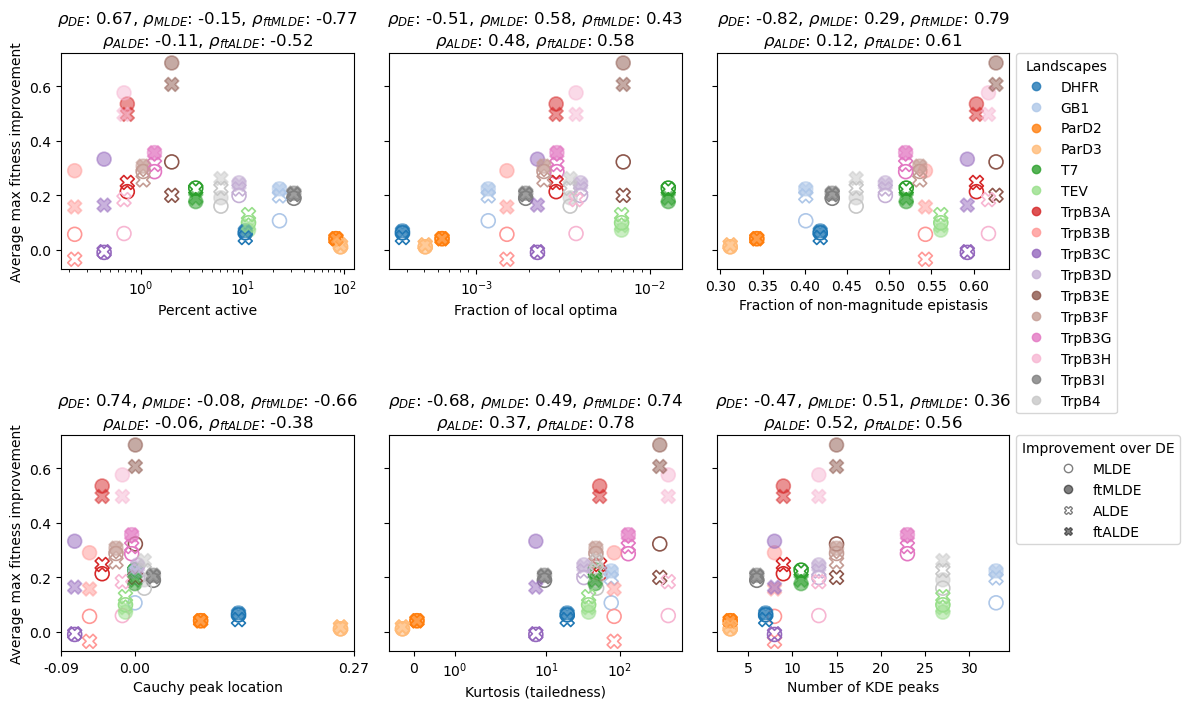

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.ticker import FormatStrFormatter
from scipy.stats import spearmanr

# Define a reusable function for scatter plots and titles
def create_scatter(
    ax, x_data, y_data, xlabel, title_fmt, x_scale="linear", y_label=None
):
    for y, label in zip(
        [mlde, ftmlde, alde_y, ftalde_y], ["MLDE", "ftMLDE", "ALDE", "ftALDE"]
    ):
        ax.scatter(
            x_data, y, edgecolors=clist, s=100, linewidth=1.2, **style_dict[label]
        )
    ax.set_xscale(x_scale)
    ax.set_xlabel(xlabel)
    if y_label:
        ax.set_ylabel(y_label)
    # Title with two lines including both MLDE/ftMLDE and ALDE/ftALDE correlations
    ax.set_title(
        (
            title_fmt.format(
                spearmanr(merge_df["single_step_DE_mean_all"], x_data)[0],
                spearmanr(mlde, x_data)[0],
                spearmanr(ftmlde, x_data)[0],
            )
            + "\n"
            + r"$\rho_{{ALDE}}$: {:.2f}, $\rho_{{ftALDE}}$: {:.2f}".format(
                spearmanr(alde_y, x_data)[0], spearmanr(ftalde_y, x_data)[0]
            )
        )
    )


# Prepare data
mlde = merge_df["top_maxes"] - merge_df["single_step_DE_mean_all"]
ftmlde = pooled_ft.to_list() - merge_df["single_step_DE_mean_all"]
alde_y = merge_df["alde_top_max"] - merge_df["single_step_DE_mean_all"]
ftalde_y = merge_df["ftalde_top_max"] - merge_df["single_step_DE_mean_all"]

clist = sns.color_palette("tab20").as_hex()[:len(merge_df["lib"].unique())]

# Updated style dictionary
style_dict = {
    "MLDE": {"facecolors": "none", "marker": "o"},
    "ftMLDE": {"facecolors": clist, "marker": "o", "alpha": 0.5},
    "ALDE": {"facecolors": "none", "marker": "X"},
    "ftALDE": {"facecolors": clist, "marker": "X", "alpha": 0.5},
}

# Create figure and axes
fig, ax = plt.subplots(2, 3, figsize=(12, 7.2), sharey=True)

# Scatter plots
create_scatter(
    ax[0, 0],
    merge_df["percent_active"],
    [mlde, ftmlde, alde_y, ftalde_y],
    "Percent active",
    r"$\rho_{{DE}}$: {:.2f}, $\rho_{{MLDE}}$: {:.2f}, $\rho_{{ftMLDE}}$: {:.2f}",
    x_scale="log",
    y_label="Average max fitness improvement",
)

create_scatter(
    ax[0, 1],
    merge_df["frac_loc_opt_total"],
    [mlde, ftmlde, alde_y, ftalde_y],
    "Fraction of local optima",
    r"$\rho_{{DE}}$: {:.2f}, $\rho_{{MLDE}}$: {:.2f}, $\rho_{{ftMLDE}}$: {:.2f}",
    x_scale="log",
)

create_scatter(
    ax[0, 2],
    merge_df["fraction_non-magnitude"],
    [mlde, ftmlde, alde_y, ftalde_y],
    "Fraction of non-magnitude epistasis",
    r"$\rho_{{DE}}$: {:.2f}, $\rho_{{MLDE}}$: {:.2f}, $\rho_{{ftMLDE}}$: {:.2f}",
)

create_scatter(
    ax[1, 0],
    merge_df["loc"],
    [mlde, ftmlde, alde_y, ftalde_y],
    "Cauchy peak location",
    r"$\rho_{{DE}}$: {:.2f}, $\rho_{{MLDE}}$: {:.2f}, $\rho_{{ftMLDE}}$: {:.2f}",
    x_scale="symlog",
    y_label="Average max fitness improvement",
)
ax[1, 0].xaxis.set_major_formatter(FormatStrFormatter("%.2f"))

create_scatter(
    ax[1, 1],
    merge_df["kurt"],
    [mlde, ftmlde, alde_y, ftalde_y],
    "Kurtosis (tailedness)",
    r"$\rho_{{DE}}$: {:.2f}, $\rho_{{MLDE}}$: {:.2f}, $\rho_{{ftMLDE}}$: {:.2f}",
    x_scale="symlog",
)

create_scatter(
    ax[1, 2],
    merge_df["numb_kde_peak"],
    [mlde, ftmlde, alde_y, ftalde_y],
    "Number of KDE peaks",
    r"$\rho_{{DE}}$: {:.2f}, $\rho_{{MLDE}}$: {:.2f}, $\rho_{{ftMLDE}}$: {:.2f}",
)

# Legends
legend_list = [
    Line2D([0], [0], marker="o", linestyle="none", color=lc, label=l, alpha=0.8)
    for l, lc in zip(merge_df["lib"], clist)
]
ax[0, 2].legend(
    handles=legend_list,
    loc="upper left",
    title="Landscapes",
    bbox_to_anchor=(1, 1.0325),
)

# Updated legend_list2 using new style_dict
legend_list2 = [
    Line2D(
        [0],
        [0],
        linestyle="none",
        marker=style_dict[label]["marker"],
        markerfacecolor=(
            "black" if style_dict[label]["facecolors"] != "none" else "none"
        ),
        markeredgecolor="black",
        alpha=0.5,
        label=label,
    )
    for label in ["MLDE", "ftMLDE", "ALDE", "ftALDE"]
]
ax[1, 2].legend(
    handles=legend_list2,
    loc="upper left",
    title="Improvement over DE",
    bbox_to_anchor=(1, 1.0315),
)

plt.tight_layout()
plt.show()